# Undirected scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin.models import PAHModel, PATCHModel, CompoundLFM
from netin import viz
from netin.stats import get_node_metadata_as_dataframe

## Network parameters

In [2]:
n = 1000
k = 2
f_m = 0.1
h_MM = 0.9
h_mm = 0.9
tc = 0.8
seed = 1234

## Generation

In [3]:
# PAH: Preferential attachment and homophily
g_pah = PAHModel(N=n, m=k, f_m=f_m, h_m=h_mm, h_M=h_MM, seed=seed)
g_pah.simulate()

In [4]:
# PATCH: Preferential attachment, homophily, and triadic closure
lfm_l = CompoundLFM.PAH
lfm_g = CompoundLFM.PAH
p_tc = .0

g_patch = PATCHModel(
    N=n, m=k, f_m=f_m,
    p_tc=p_tc,
    lfm_local=lfm_l, lfm_global=lfm_g,
    lfm_params={'h_m': h_mm, 'h_M': h_MM},
    seed=seed)

g_patch.simulate()

## Plots

In [5]:
viz.reset_style()
viz.set_paper_style()

### Graph

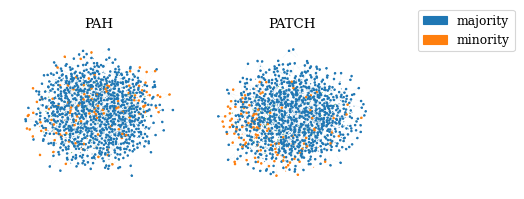

In [6]:
models = [g_pah, g_patch] #[g_pa, g_pah, g_patc, g_patch, g_tch]
viz.plot_graph(
    models,
    cell_size=2, share_pos=False,
    ignore_singletons=False)

### Node attributes

In [7]:
md_pah = get_node_metadata_as_dataframe(graph=g_pah.graph, n_jobs=10)
md_pah.name = PAHModel.SHORT

md_patch = get_node_metadata_as_dataframe(graph=g_patch.graph, n_jobs=10)
md_patch.name = PATCHModel.SHORT


QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
# see example of genereate metadata
md_pah.head()

,node,class_label,real_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,0,M,42,NaN,NaN,0.005807,0.105121,0.341772,0.203668,0.009038,0.09375,NaN,NaN,0.804878,0.003055,0.006729,0.004004,0.003012
1,1,0,M,55,NaN,NaN,0.007407,0.151461,0.358193,0.373081,0.011814,0.03125,NaN,NaN,0.707317,0.001018,0.001346,0.001001,0.001004
2,2,0,M,17,NaN,NaN,0.022059,0.035244,0.321429,0.131392,0.003653,0.53125,NaN,NaN,0.317073,0.017312,0.013459,0.009009,0.024096
3,3,0,M,35,NaN,NaN,0.013445,0.096097,0.353253,0.256480,0.007361,0.15625,NaN,NaN,0.512195,0.004073,0.004038,0.003003,0.007028
4,4,0,M,2,NaN,NaN,0.000000,0.000488,0.284778,0.048104,0.000512,1.00000,NaN,NaN,1.000000,0.595723,0.053836,0.056056,0.997992


In [9]:
# all into a list
distributions = [
    md_pah, md_patch
    ]

#### Degree

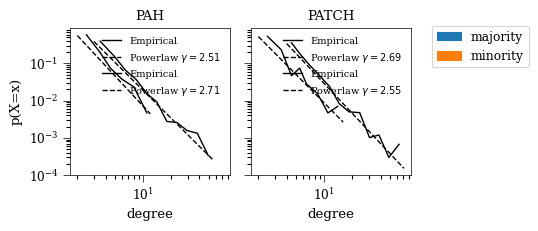

In [10]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='pdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

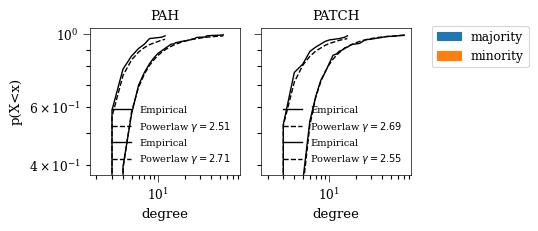

In [11]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='cdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

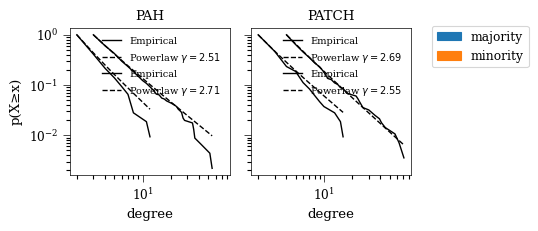

In [12]:
viz.plot_powerlaw_fit(distributions, col_name='degree', hue='class_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### Clustering

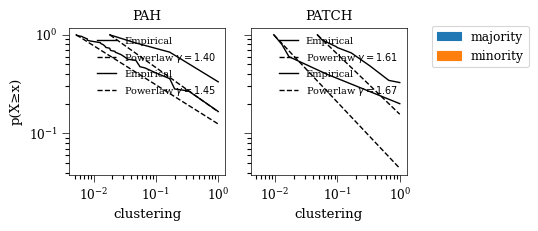

In [13]:
viz.plot_powerlaw_fit(distributions, col_name='clustering', hue='class_label',
                      kind='ccdf', fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)

#### PageRank

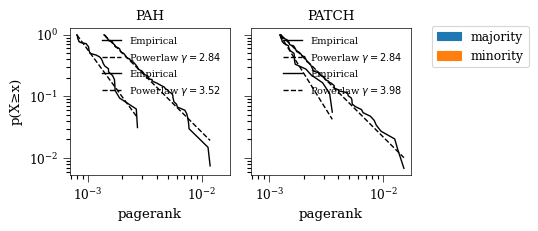

In [14]:
viz.plot_powerlaw_fit(distributions, col_name='pagerank', hue='class_label',
                      kind='ccdf', verbose=False, bbox=(1, 0.9), fontsize=7,
                      cell_size=(2.15,2.4), sharex=True, sharey=True)